<a href="https://colab.research.google.com/github/eugenekk/kaggle_shadow/blob/main/model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1주차 타이타닉

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [9]:
# 각자 작업 환경에 맞는 경로를 지정해주세요. Google Colab과 Jupyter환경에서 경로가 다를 수 있습니다.
path = '/content/drive/MyDrive/Kaggle_shadow/1_titanic'

In [10]:
import os
import pandas as pd

In [11]:
df_train = pd.read_csv(os.path.join(path, 'train.csv'), encoding='utf-8')
df_test = pd.read_csv(os.path.join(path, 'test.csv'), encoding='utf-8')

In [12]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [13]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#matplotlib 의 기본 scheme 말고 seaborn scheme을 세팅하고, 폰트 크기를 default로 지정해두기
plt.style.use('seaborn')
sns.set(font_scale = 2.5)

#결측데이터를 파악하는데 직관적인 도움을 주는 패키지(그래프 시각화 패키지)
import missingno as msno

#ignore warnings
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

# 1. 데이터셋 확인
- 결측치를 확인하고 데이터의 생김새를 파악한다

In [15]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## train 데이터의 feature 와 label 확인
- feature : Pclass, Age, SibSp, Parch, Fare (왜 이것만 피쳐로 쓰는가?)
- 예측 label : Survived
---
- Survived : 생존여부 : 0/1 : integer
- Pclass : 티켓클래스 : 1/2/3 (categorical) : integer
- Sex : 성별 : male/female (binary) : string
-Age : 나이 : continous : integer
- sibSp : 함께 탑승한 형제/배우자 수 : quantitative : integer
- Parch : 함께 탑승한 부모/아이의 수 : quantitative : integer
- Ticket : 티켓번호 : alpabet + integer : string
- fare : 탑승료 : continuous : float
- cabin : 객실번호 : alphabet + integer : float
- Embarked : 탑승항구 : C/Q/S : string









In [16]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## 1.1 Null data check

In [28]:
for col in df_train.columns : 
    nullPercent = 100 * df_train[col].isnull().sum()/df_train[col].shape[0]
    msg = f'column : {col:11s} Percent of NaN value : {nullPercent}'
    print(msg)

column : PassengerId Percent of NaN value : 0.0
column : Survived    Percent of NaN value : 0.0
column : Pclass      Percent of NaN value : 0.0
column : Name        Percent of NaN value : 0.0
column : Sex         Percent of NaN value : 0.0
column : Age         Percent of NaN value : 19.865319865319865
column : SibSp       Percent of NaN value : 0.0
column : Parch       Percent of NaN value : 0.0
column : Ticket      Percent of NaN value : 0.0
column : Fare        Percent of NaN value : 0.0
column : Cabin       Percent of NaN value : 77.10437710437711
column : Embarked    Percent of NaN value : 0.2244668911335578


In [30]:
for col in df_test.columns:
    nullPercent = 100*df_test[col].isnull().sum()/df_test[col].shape[0]
    msg = f'column : {col:11s} Percent of NaN value : {nullPercent}'
    print(msg)

column : PassengerId Percent of NaN value : 0.0
column : Pclass      Percent of NaN value : 0.0
column : Name        Percent of NaN value : 0.0
column : Sex         Percent of NaN value : 0.0
column : Age         Percent of NaN value : 20.574162679425836
column : SibSp       Percent of NaN value : 0.0
column : Parch       Percent of NaN value : 0.0
column : Ticket      Percent of NaN value : 0.0
column : Fare        Percent of NaN value : 0.23923444976076555
column : Cabin       Percent of NaN value : 78.22966507177034
column : Embarked    Percent of NaN value : 0.0


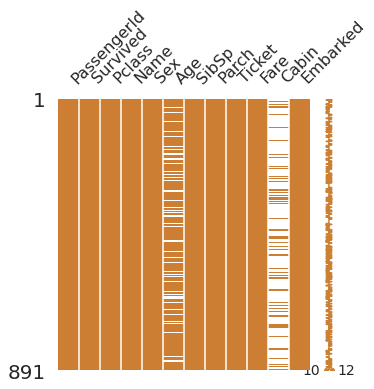

In [33]:
# data.iloc[0:5, 5:8] # 첫 5개 행과 5th, 6th, 7th 열만
# iloc를 안해도 된다
# color 파라미터는 RGB를 지정해주는 것이다.
msno.matrix(df=df_train.iloc[:,:], figsize=(5,5), color=(0.8,0.5,0.2))

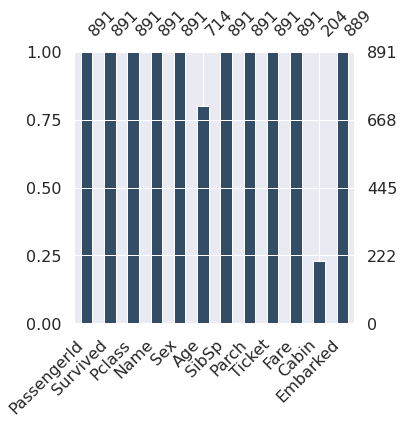

In [35]:
msno.bar(df=df_train.iloc[:,:], figsize=(5,5), color =(0.2,0.3,0.4))

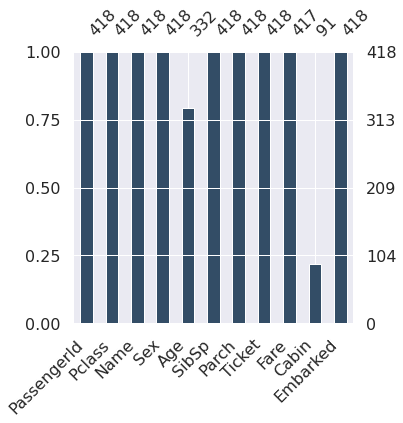

In [36]:
# iloc를 안해도 된다 
msno.bar(df=df_test, figsize=(5,5), color=(0.2,0.3,0.4))

## 1.2 Target Lable 확인하기
- 예측 Target Label 이 어떤 특징을 가지고 있는지 확인
- 지금은 0/1의 binary classification
- 가지고 있는 데이터의 0/1 데이터 분포에 따라 모델의 평가방법이 달라진다

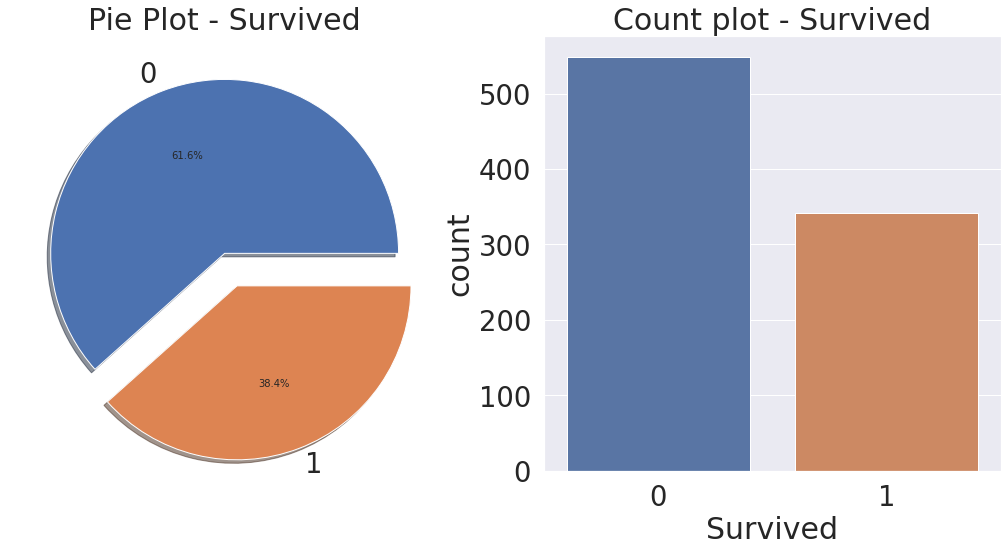

In [45]:
# 한번에 여러 그래프를 보여주기 위해 사용되는 코드
f, ax = plt.subplots(1,2, figsize=(18,8)) #행 1줄, 열 2줄

# 파이차트 그리기(explode : 파이차트 갈라지는 크기, autopct : 파이차트 숫자값 소수점 몇자리까지?)
df_train['Survived'].value_counts().plot.pie(explode=[0,0.2], autopct='%1.1f%%', ax=ax[0], shadow=True)
ax[0].set_title('Pie Plot - Survived')
ax[0].set_ylabel('')

sns.countplot('Survived', data=df_train, ax=ax[1])
ax[1].set_title('Count plot - Survived')

plt.show()

- 38.4%가 생존
- target label의 분포가 제법 균일하다.
- 불균일한 경우, 예를들어 100중 1:99 정도인 경우는 만약 모델이 모두 1이라고 예측을 해도 정확도가 99%가 된다. 0을 찾는 문제라면, 이 모델은 원하는 결과를 줄 수 없으므로 정확도를 다른 방법을 찾던가 전처리를 해야함. 이 모델은 그렇지 않으므로 계속 진행

# 2. 탐색적 데이터분석(Exploratory data analysis)
- 여러 feature 들을 개별적으로 분석하고, 상관관계를 파악한다.
- 여러 시각화 툴을 활용하여 insight를 얻는다

## 2.1 Pclass
- Pclass는 ordinal, 서수형 데이터이다.
- 카테고리컬 데이터, 순서가 있는 데이터 타입
- 먼저 Pclass 에 따른 생존률의 차이를 살펴보자 : groupby , pivot
- Pclass, Survived 열을 가져오기 -> Pclass로 groupby -> 각 Pclass마다 Survived의 0/1값을 count -> 평균내기 = 생존률

In [46]:
# 전체 개수
df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=True).count()

,Survived
Pclass,
1,216
2,184
3,491


In [47]:
# 생존자 수 (합계면 1값만 카운트 되므로)
df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=True).sum()

,Survived
Pclass,
1,136
2,87
3,119


In [51]:
# 동일한 과정을 좀 더 시각화 해본다면
pd.crosstab(df_train['Pclass'], df_train['Survived'], margins = True)

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


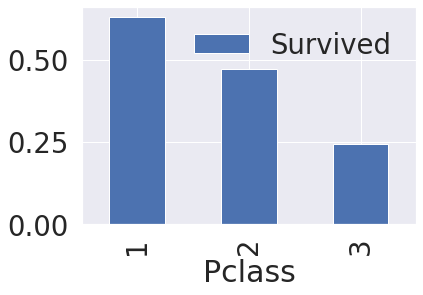

In [55]:
# groupby 객체에 mean을 하면 생존률을 얻을 수있다.
# 무엇이 가장 중요한지에 파악하기 위해서는 sort_values 이 필요하다.
# 기본적으로 오름차순으로 정렬이 되는데, 내림차순으로 정렬이 되려면 다음과 같이 ascending을 입력

df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index =True).mean().sort_values(by='Survived', ascending =False).plot.bar()

- Pclass가 좋을수록(1등석) 생존률이 높다.

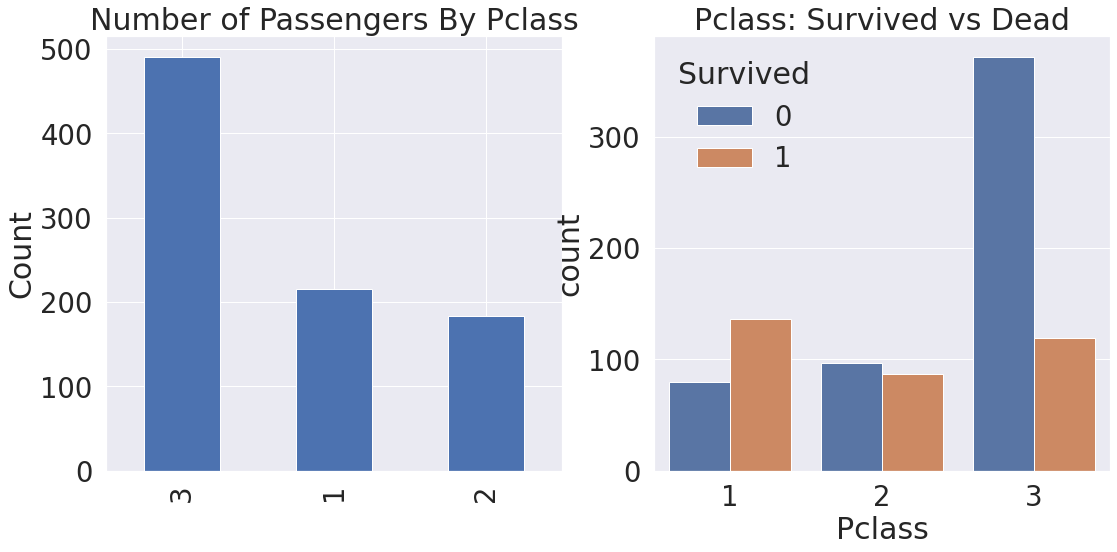

In [69]:
# 특정 라벨에 따른 개수를 확인해보기
f, ax = plt.subplots(1,2, figsize = (18,8))

df_train['Pclass'].value_counts().plot.bar(ax=ax[0])
ax[0].set_title('Number of Passengers By Pclass')
ax[0].set_ylabel('Count')

# hue 범주 써주기
sns.countplot('Pclass', hue='Survived', data=df_train, ax=ax[1])
ax[1].set_title('Pclass: Survived vs Dead')

plt.show()

- 클래스가 높을 수록 생존 확률이 높은 걸 확인할 수 있다.
- 생존에 Pclass 가 큰 영향을 미친다고 생각할 수 있다

## 2.2 Sex
- 성별에 따른 생존률 확인해보기

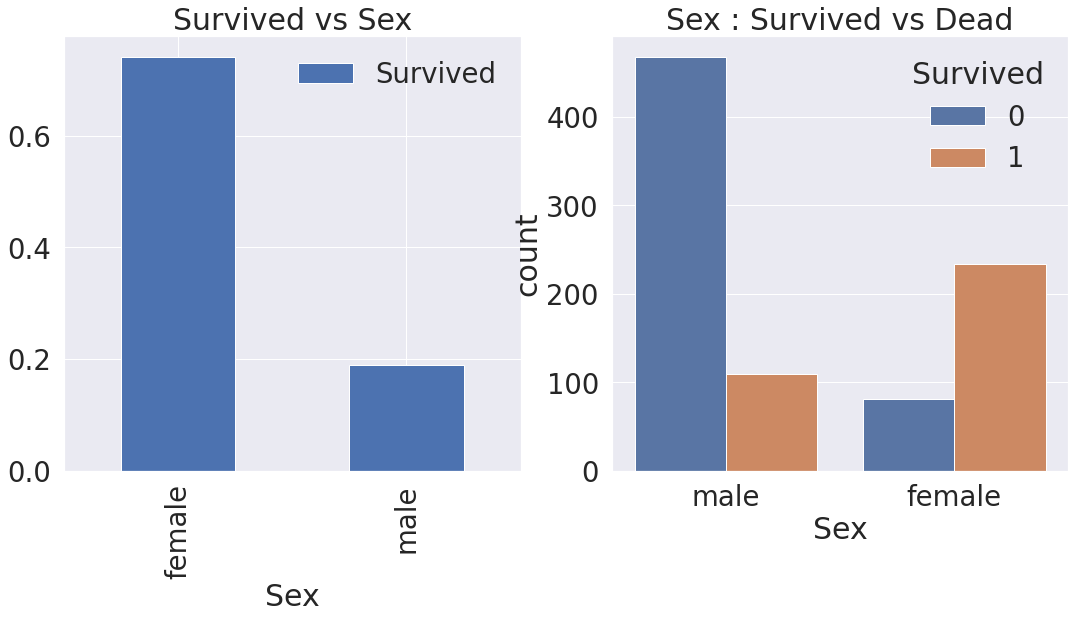

In [71]:
f, ax = plt.subplots(1,2, figsize=(18,8))
df_train[["Sex", "Survived"]].groupby(['Sex'], as_index = True).mean().plot.bar(ax=ax[0])
ax[0].set_title("Survived vs Sex")

sns.countplot('Sex', hue="Survived", data=df_train, ax=ax[1])
ax[1].set_title("Sex : Survived vs Dead")

plt.show()

In [72]:
pd.crosstab(df_train['Sex'], df_train['Survived'], margins=True)

Survived,0,1,All
Sex,,,
female,81,233,314
male,468,109,577
All,549,342,891


- 여자가 생존확률이 높다.
- 생존여부와 관련이 깊은 중요한 feature

## 2.3 Sex & Pclass
- sex, pclass 두개를 동시에 생존이 어떻게 달라지는지 확인하기

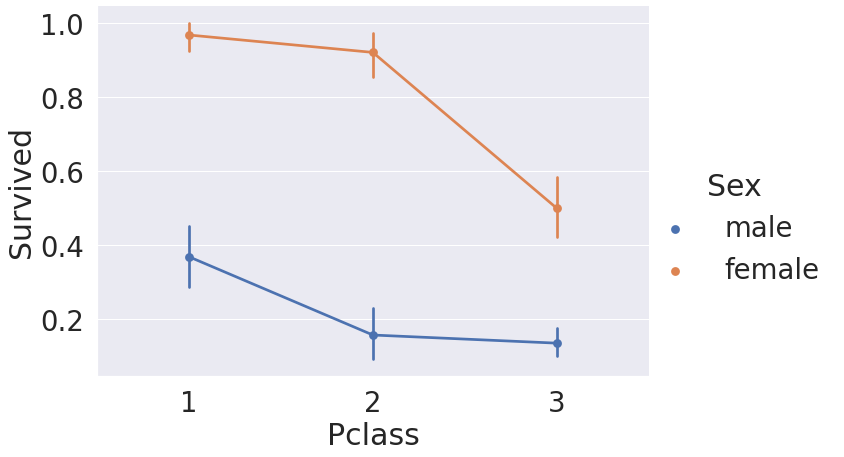

In [74]:
sns.factorplot('Pclass', 'Survived', hue="Sex", data=df_train, size = 6, aspect = 1.5)

- 클래스는 1-> 2-> 3
- 여자 남자 상관없이 클래스가 높을 수록 생존 확률 높다
- 모든 클래스에서 여자 -> 남자

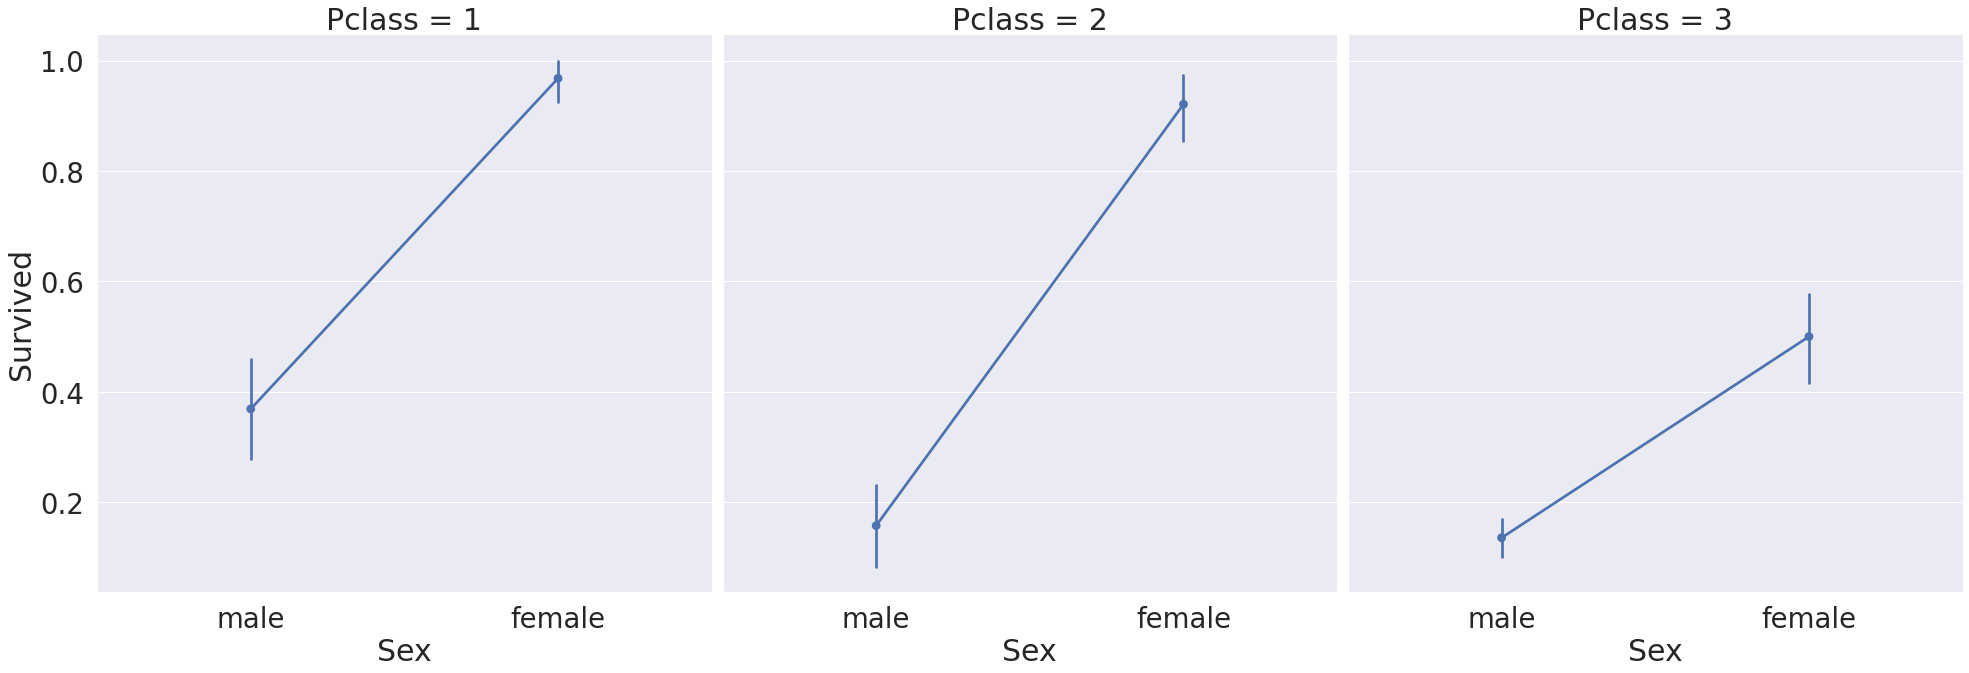

In [75]:
sns.factorplot(x='Sex', y='Survived', col = "Pclass", data=df_train, saturation = .05, size = 9, aspect =1)